<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-the--data" data-toc-modified-id="Exploratory-the--data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory the  data</a></span></li><li><span><a href="#Explonatory-the-data" data-toc-modified-id="Explonatory-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explonatory the data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Feature-scalling" data-toc-modified-id="Feature-scalling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature scalling</a></span></li><li><span><a href="#Select-and-Train-The-model" data-toc-modified-id="Select-and-Train-The-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Select and Train The model</a></span></li><li><span><a href="#Fine-Tune-our-model" data-toc-modified-id="Fine-Tune-our-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Fine-Tune our model</a></span></li></ul></div>

In [100]:
import os
import urllib
import tarfile

**create function to fetch data download and load it**

**defining the data's place**

In [101]:

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [102]:
#creating directory and download the data file 
fetch_housing_data()

In [103]:
import pandas as pd
#reading data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

### Exploratory the  data 

In [104]:
# read our dataframe as housing
housing = load_housing_data()
# take a quick view at the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [105]:
# quick descreption of the data 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> looks like we have 207 missing value in bedrooms feature

> just ocean_proximity not float

In [106]:
# about ocean_proximity's values
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [107]:
# summarty of numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


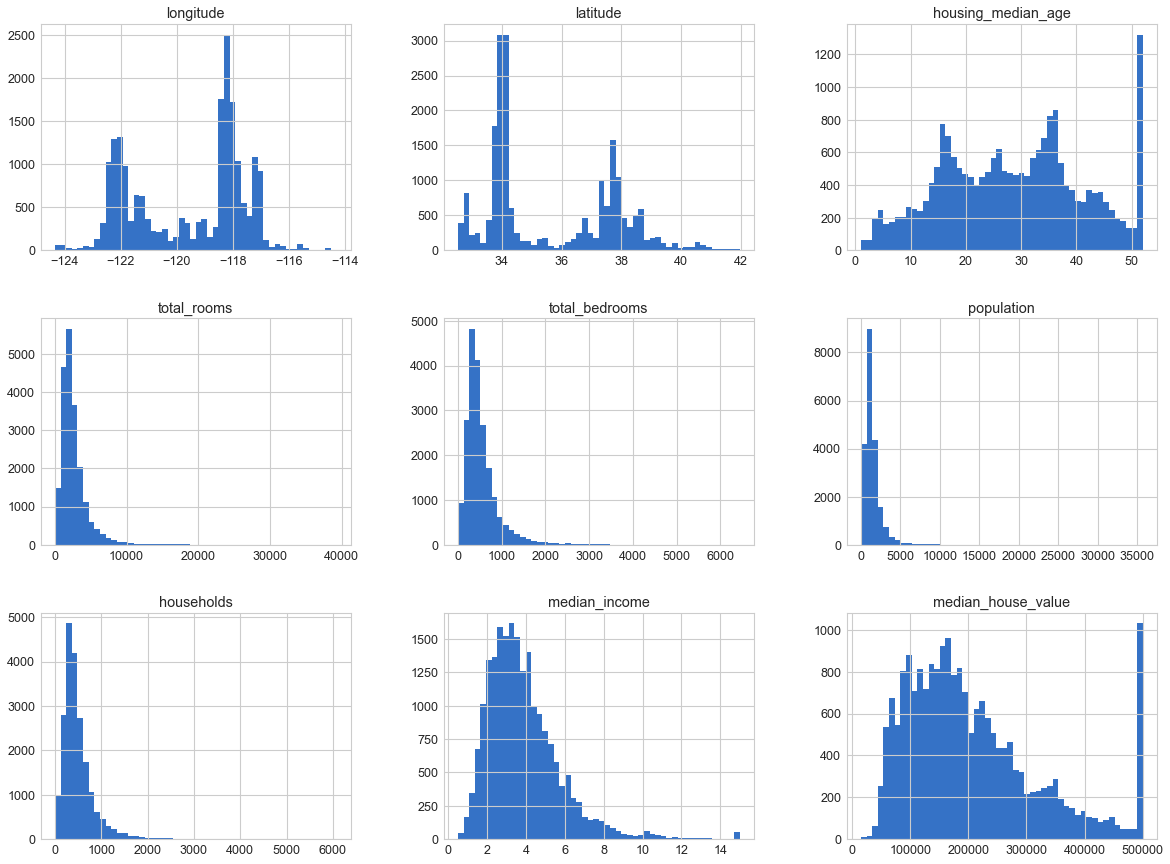

In [108]:
# quick exploratory of the data
from jupyterthemes import jtplot
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20,15));
jtplot.style()

In [109]:
# creating a test set 
from sklearn.model_selection import train_test_split
                                    # The data , test size , random_seed(42) for fixed test set
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

**Creating median income categories**

In [110]:
import numpy as np 
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0.,1.5,3.0,4.5,6.,np.inf],
                              labels=[1, 2, 3, 4, 5])

Text(0.5, 1.0, 'income categories')

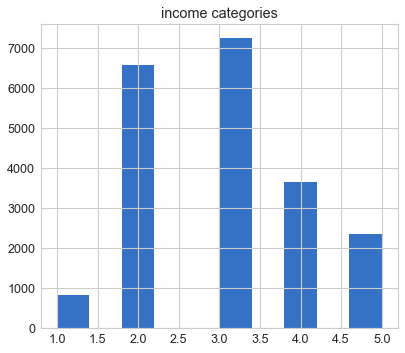

In [111]:
plt.hist(housing['income_cat'])
plt.title('income categories')

**now we can do stratified sampling**

In [112]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [113]:
# proportion of each category in incomes
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [114]:
# remove categories 
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

### Explonatory the data 

**Discvoer and visualize The data**


In [115]:
#but test set aside 
housing = strat_train_set.copy()

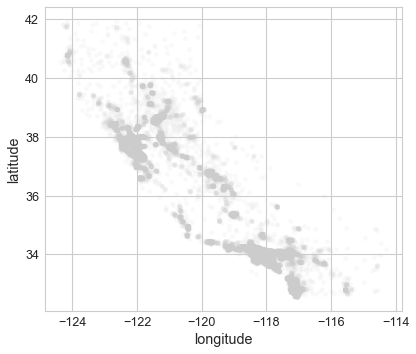

In [116]:
housing.plot(kind = 'scatter', x = 'longitude', y='latitude', alpha=0.1);


**add housing price and the population features to above scatter will give us more useful insights**

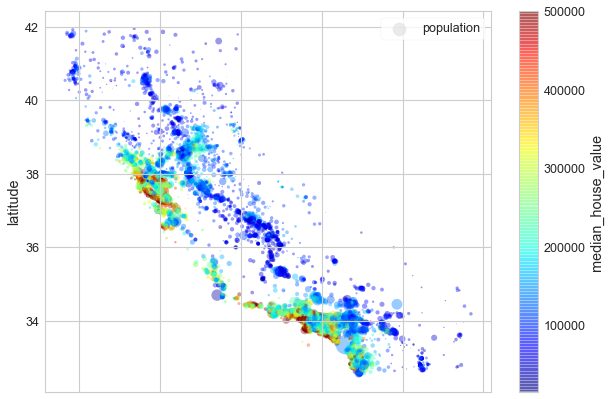

In [117]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha =0.4,
            s=housing['population']/100,
             label='population', figsize=(10,7),
            c='median_house_value',cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend();

**The colors above telss us red = expinsive hous, blue = cheap | large_indicates = Large population**

**we can see corrolation here between houses close to ocean and high price**

  > **looking for correlations** 

In [118]:
corr_matrix = housing.corr()

In [119]:
corr_matrix['median_house_value'].sort_values(ascending=True)

latitude             -0.142724
longitude            -0.047432
population           -0.026920
total_bedrooms        0.047689
households            0.064506
housing_median_age    0.114110
total_rooms           0.135097
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

**here we can see positive correlation with median_house_value and median_income**  
**in other words: when income incrase the house values incrase**


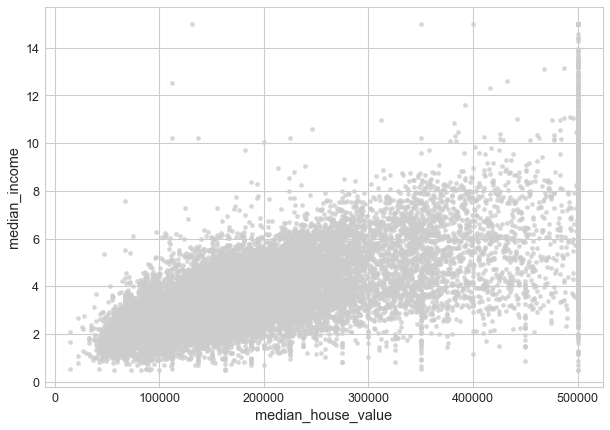

In [120]:
housing.plot(kind='scatter', x='median_house_value', y='median_income', alpha=0.8, figsize=(10,7));

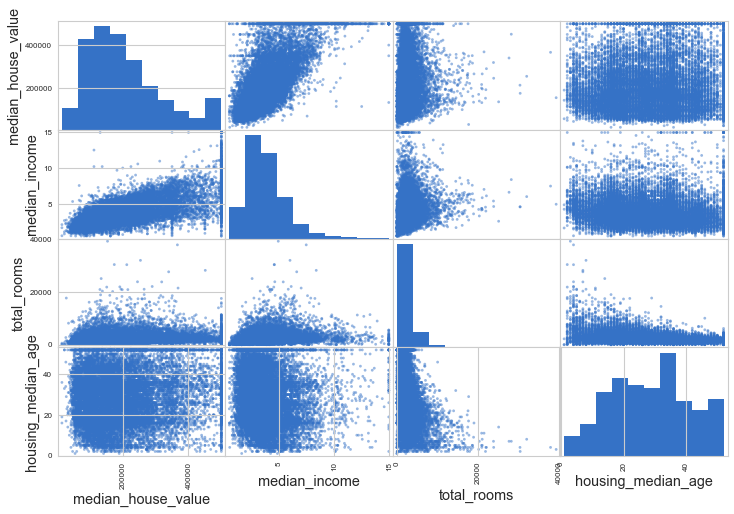

In [121]:
from pandas.plotting import scatter_matrix
# check for correlation bettwen these specific attributes against each of them
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8));

<br/>**now we see the most promising attribute to predict house price is "median_income"**  
<br/> 

> **Will Try some attribute combinations**

In [122]:
# number of rooms per house hold
housing['rooms_per_household']= housing['total_rooms']/housing['households']
# compare num of bedrooms per total rooms
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
# population per household
housing['population_per_household'] = housing['population']/housing['households']

**lets look at the correlations again** 


In [123]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=True)

bedrooms_per_room          -0.259984
latitude                   -0.142724
longitude                  -0.047432
population                 -0.026920
population_per_household   -0.021985
total_bedrooms              0.047689
households                  0.064506
housing_median_age          0.114110
total_rooms                 0.135097
rooms_per_household         0.146285
median_income               0.687160
median_house_value          1.000000
Name: median_house_value, dtype: float64

**there is negative correlation between bedrooms_per_room and median_house_value**  
**rooms_per_household more informative than total_rooms**

<br/>**sepearte predictors and lables**

In [124]:
housing = strat_train_set.drop(['median_house_value'],axis=1)
housing_lables = strat_train_set['median_house_value'].copy()

### Data Cleaning

**fill the missing data in total_bedrooms with the median**

In [125]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

**exclude categorical attributes to compute the median** 

In [126]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [127]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [128]:
# median of all features
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

**daeling with categorical feature**

In [129]:
housing_cat = housing[['ocean_proximity']]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

**convert text to numbers**

In [130]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_encoded = cat_encoder.fit_transform(housing_cat)
housing_cat_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [131]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Feature scalling 

>**this below code copied from hands on machine learning [book by ageron]**

**custom Transformer to add extra attributes**

In [132]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

**recover The data frame**

In [133]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


**Transformation Pipelines**

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [135]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

**apply our transformations to the data**

In [136]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

### Select and Train The model 

**First Test linear regression**

In [137]:
from sklearn.linear_model import LinearRegression
lr_mod = LinearRegression()
lr_mod.fit(housing_prepared, housing_lables)

LinearRegression()

**try the model in very small sample**

In [138]:
some_data = housing.iloc[:5]
some_labels = housing_lables.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predictions : ', lr_mod.predict(some_data_prepared))

predictions :  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [139]:
print('the labels predicted', list(some_labels))

the labels predicted [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


**mesure model error using rmse on the hole data**

In [140]:
from sklearn.metrics import mean_squared_error
housing_prediection = lr_mod.predict(housing_prepared)
lr_rmse = mean_squared_error(housing_lables, housing_prediection)
calc_rmse = np.sqrt(lr_rmse)
calc_rmse

68628.19819848922

**Trying Desicion Tree Model**

In [141]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_lables)
housing_prediection = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_lables, housing_prediection)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**there is 0.0 error can be perfect model ! let's try it on the test set**

In [142]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_lables, 
                        scoring ='neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

**let's look at the result**

In [143]:
def display_scores(scores) : 
    print('scores', scores)
    print('mean',scores.mean())
    print('std', scores.std())

In [144]:
display_scores(tree_rmse_scores)

scores [68255.71193962 67572.76264784 71001.11512361 67951.7728902
 71477.08729232 74928.67819083 71050.35656787 70133.42821999
 76551.07336434 69790.32023386]
mean 70871.23064704775
std 2776.621954795037


**compute the same score for the linear regression model**

In [145]:
linear_cross = cross_val_score(lr_mod, housing_prepared, housing_lables,
                              scoring='neg_mean_squared_error', cv = 10)
lr_rmse_scores = np.sqrt(-linear_cross)
display_scores(lr_rmse_scores)

scores [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean 69052.46136345083
std 2731.674001798347


**obiviously linear regression model doing better than Desicion Tree model**

> **let's try  RandomForestRegressor**

In [146]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_lables)

RandomForestRegressor()

In [147]:
housing_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_lables, housing_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18766.7741639318

In [149]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_lables,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)


In [150]:
display_scores(forest_rmse_scores)

scores [49689.96420378 47586.35597549 49854.18980195 52121.56755203
 49299.4120335  53342.55472648 48654.82849711 48378.73096805
 52887.64201396 50409.96719252]
mean 50222.52129648803
std 1858.9512267392965


**looks like rondom forest regressor is promising than to other model**


### Fine-Tune our model 